

Parcial trecer corte HPC para IA

Nombre: Juan Andrés González Molina

Profesor: John Jairo Corredor Franco

Institución: Universidad Sergio Arboleda


Lo primero es importar las librerías para trabajar con los datos:

*    Pandas: Librería para leer el archivo que contiene el dataset y trabajarlo como un objeto DataFrame.
*    Sklearn: Librería de uso general en Machine Learning, contiene tanto funcionalidades para estandarizar lo datos, como para hacer predicciones de los mismos.
*    Seaborn: Librería para la visualización estadística de los datos.
*    Matplotlib: Librería para graficar los datos.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline


Paso 1: Leer el dataset.

In [2]:
df = pd.read_csv('diamondsHPC.csv')

Visualización de las primeras 5 filas del dataset.

In [3]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,6,1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,6,1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,6,1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,3,0,61.0,58.0,2757,6.15,6.12,3.74


Paso 2: Mover la columna de resultados ('price') al último lugar.

Esto debido a que el programa realizado en C++ para ejecutar la regresión lineal toma la última columna como la columna de resultados.

In [4]:
columns = list(df.columns)
columns.remove('price')
columns.append('price')
df = df[columns]

In [5]:
# Se imprime el nombre de las columnas.
list(df.columns)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']

Paso 3: Realizar EDA (Exploratory Data Analysis) del dataset.

In [6]:
# EDA del dataset:

# 1.0 -> información completa del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [7]:
# 2.0 -> Se presenta un resumen estadístico de los datos.
df.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,1.228940,3.174416,2.256136,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.265976,2.050156,1.766539,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,0.000000,1.000000,1.000000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,1.000000,4.000000,2.000000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,3.000000,5.000000,3.000000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


Correlación entre las variables dependientes e independientes.

Se observa una alta correlación entre algunas de las variables, mientras que en otras, existe una correlación muy baja.

Se puede esperar un resultado poco satisfactorio del proceso de regresión lineal, teniendo baja precisión sobre los datos, así como de las predicciones.

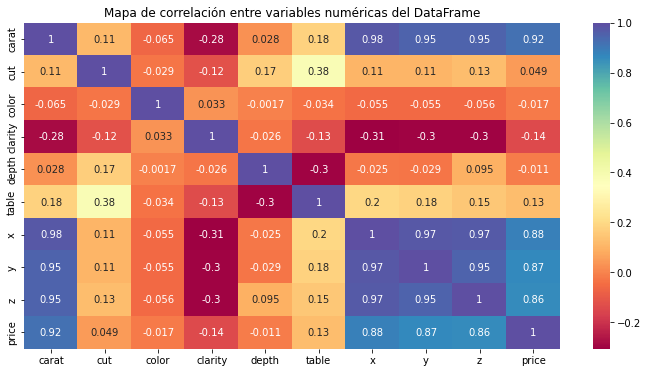

In [8]:
# 3.0 -> A continuación se presenta la matriz de correlación: Relación entre
# las variables dependientes e independientes.

math_correlacion = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(math_correlacion, annot=True, cmap='Spectral')
plt.title('Mapa de correlación entre variables numéricas del DataFrame')
plt.show()

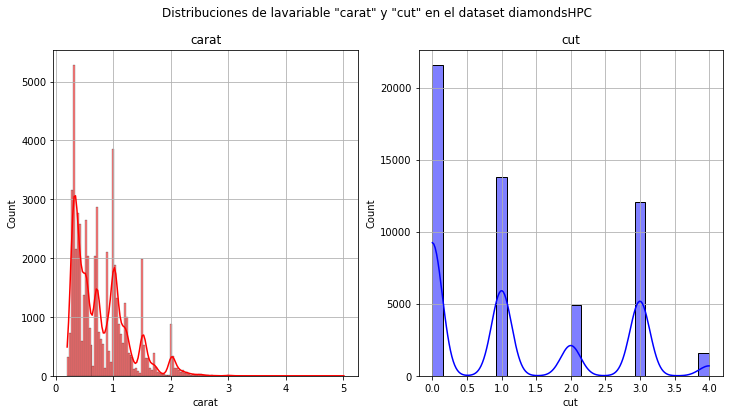

In [9]:
from IPython.core.pylabtools import figsize
# 4.1 -> Se grafica la distribución de la variable independiente 'carat' y 'cut'
fig, axes = plt.subplots(1, 2, figsize=(12,6))

fig.suptitle('Distribuciones de lavariable "carat" y "cut" en el dataset diamondsHPC')

sns.histplot(df['carat'], ax=axes[0], kde=True, color='r')
axes[0].set_title('carat')
axes[0].grid()

sns.histplot(df['cut'], ax=axes[1], kde=True, color='b')
axes[1].set_title('cut')
axes[1].grid()

plt.show()

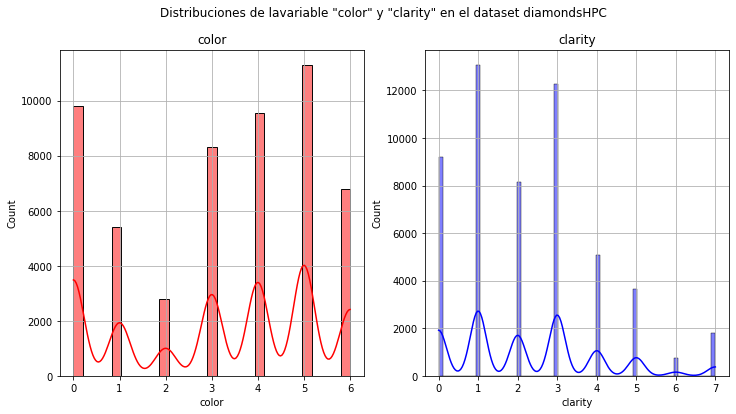

In [10]:
from IPython.core.pylabtools import figsize
# 4.2 -> Se grafica la distribución de la variable independiente 'color' y 'clarity'
fig, axes = plt.subplots(1, 2, figsize=(12,6))

fig.suptitle('Distribuciones de lavariable "color" y "clarity" en el dataset diamondsHPC')

sns.histplot(df['color'], ax=axes[0], kde=True, color='r')
axes[0].set_title('color')
axes[0].grid()

sns.histplot(df['clarity'], ax=axes[1], kde=True, color='b')
axes[1].set_title('clarity')
axes[1].grid()

plt.show()

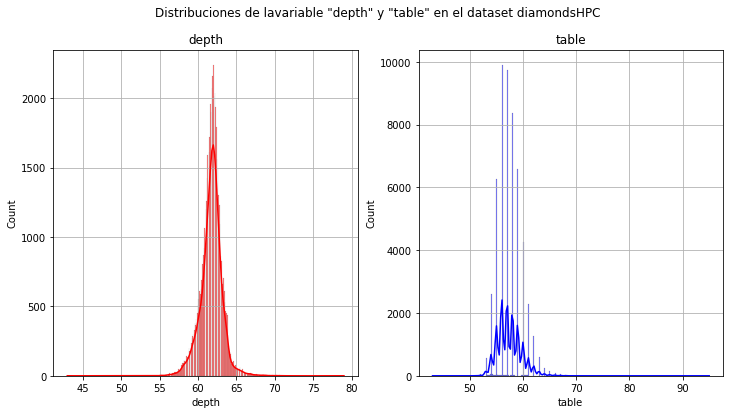

In [11]:
from IPython.core.pylabtools import figsize
# 4.3 -> Se grafica la distribución de la variable independiente 'depth' y 'table'
fig, axes = plt.subplots(1, 2, figsize=(12,6))

fig.suptitle('Distribuciones de lavariable "depth" y "table" en el dataset diamondsHPC')

sns.histplot(df['depth'], ax=axes[0], kde=True, color='r')
axes[0].set_title('depth')
axes[0].grid()

sns.histplot(df['table'], ax=axes[1], kde=True, color='b')
axes[1].set_title('table')
axes[1].grid()

plt.show()

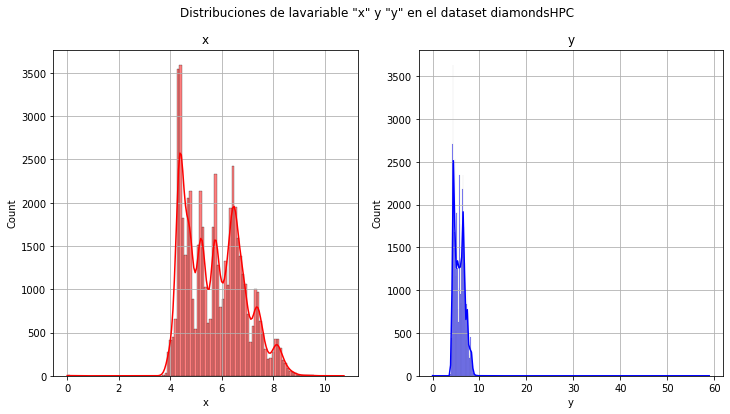

In [12]:
from IPython.core.pylabtools import figsize
# 4.3 -> Se grafica la distribución de la variable independiente 'x' y 'y'
fig, axes = plt.subplots(1, 2, figsize=(12,6))

fig.suptitle('Distribuciones de lavariable "x" y "y" en el dataset diamondsHPC')

sns.histplot(df['x'], ax=axes[0], kde=True, color='r')
axes[0].set_title('x')
axes[0].grid()

sns.histplot(df['y'], ax=axes[1], kde=True, color='b')
axes[1].set_title('y')
axes[1].grid()

plt.show()

De las correlaciones anteriormente mostradas, sólo se evidenica que la variable 'depth' sigue una distribución normal.

Como resultado del EDA anteriormente realizado, se espera una baja precisión del modelo sobre este conjunto de datos, esto teniendo en cuenta la correlación que existe entre las variables independientes con la variable dependiente.

Modelo en Python-Sklearn para Regresión Lineal usando la Normalización.

Modelo en Python-Sklearn 1.0:

Se separan las variables independientes y la variable dependiente.

In [13]:
# 1.0 -> A continuación se separan las variables dependientes de las variables
# independientes.
X = df.drop(['price'], axis=1)
y = df['price']

Modelo en Python-Sklearn 2.0:

Se separan los datos en dos grupos:
*    Train: Corresponden al 80 % de los datos.
*    Test: Corresponden al 20 % de los datos.

In [14]:
# 2.0 -> Se hacen los grupos para entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Modelo en Python-Sklearn 3.0:

Se crea un PipeLine para la creación del modelo:
*    scaler: Clase que estandariza los datos realizando una normalización
*    LR: Clase que realiza la normalización sobre los datos normalizados.

In [15]:
# 3.0 -> A continuación se hace un pipeline para entrenar el modelo, usando la 
# normalización (similar a lo elaborado en C++).
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])

Modelo en Python-Sklearn 4.0:

Se entrena el modelo.

In [16]:
# 4.0 -> Entrenamiento del modelo.
pipe.fit(X_train, y=y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

Modelo en Python-Sklearn 5.0:

Se entrena el modelo.

In [17]:
# 5.0 -> Evaluación del modelo sobre los datos de entrenamiento.
pipe.score(X_train, y_train)

0.871558110664378

In [18]:
# Vector de coeficientes del modelo entrenado.
pipe['LR'].coef_

array([ 4963.52398196,  -104.63669224,   197.01982524,   518.5012048 ,
        -231.22393586,  -143.69864676, -1020.58358118,   114.90937   ,
         101.83271413])

In [19]:
# Punto de corte del modelo entrenado.
pipe['LR'].intercept_

4445.475551538746

Métrica de rendimiento.

Vectores de predicciones:
*    y_hat_train_sk: Predicciones sobre los datos de entrenamiento.
*    y_hat_test_sk Predicciones sobre los datos de test

Explicación de la métrica R²:

R², el coeficiente de determinación, determina la capacidad de un modelo para predecir futuros resultados. El mejor resultado posible es 1.0, y ocurre cuando la predicción coincide con los valores de la variable objetivo. R2 puede tomar valores negativos pues la predicción puede ser arbitrariamente mala. Cuando la predicción coincide con la esperanza de los valores de la variable objetivo, el resultado de R2 es 0. Se define como 1 menos la suma de cuadrados totales dividido por la suma de cuadrados de los residuos:

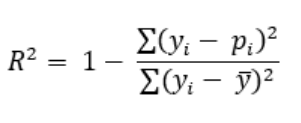

In [20]:
# 1.0 -> Vectores de predicción de sklearn
y_hat_train_sk = pipe.predict(X_train)
y_hat_test_sk = pipe.predict(X_test)

In [21]:
# 2.1 -> Función para calcular la métrica R²
from sklearn.metrics import r2_score

Métrica R² sobre 

In [22]:
# 2.2 -> Métrica de rendimiento sobre los datos de entrenamiento.
r2_score(y_train, y_hat_train_sk)

0.871558110664378

In [23]:
# 2.3 -> Métrica de rendimiento sobre los datos de entrenamiento.
r2_score(y_test, y_hat_test_sk)

-0.9244472202090794

Conclusión sobre las métricas de rendimiento (R²):

*    Train: El modelo se ajusta de forma razonable a los datos de entrenamiento, teniendo un rendimiento que aunque no es notablemente preciso, maneja un nivel de precisión razonable.

*    Test: El modelo no se ajusta de forma correcta a las predicciones, siendo incluso peor que calcular la media de los datos. 

Comparación entre el modelo entrenado con Sklearn vs C++

In [24]:
# 1.1 -> Leer el vector de costos generado por el modelo
# en C++
costo = pd.read_csv('VectorCosto.txt')

In [29]:
# 1.2 ->  Leer las predicciones realizadas por el modelo en C++ sobre los datos
# sobre los datos de entrenamiento.
y_hat = pd.read_csv('y_train_hat.txt', header=None)
y_hat

,0
0,104.279
1,-1894.270
2,-2077.810
3,-1484.990
4,-491.454
...,...
43148,1032.310
43149,1758.910
43150,558.928
43151,2097.910


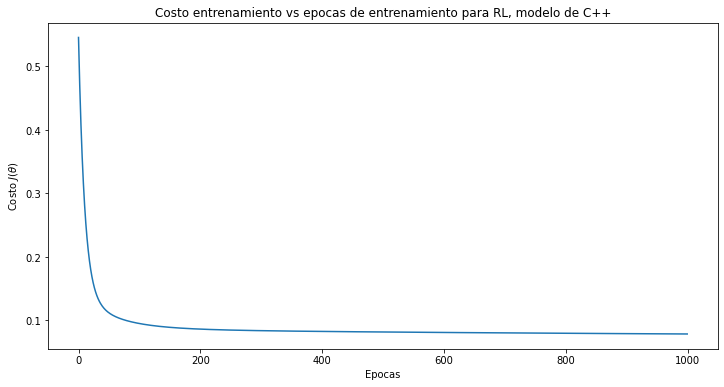

In [33]:
# 2.0 -> A continuación se grafica la función de costo de nuesro modelo artesanal (C++)

fig, axes = plt.subplots(figsize=(12,6))

axes.plot(costo)
axes.set_title('Costo entrenamiento vs epocas de entrenamiento para RL, modelo de C++')
axes.set_xlabel('Epocas')
axes.set_ylabel(r'Costo $J(\theta)$')
plt.show()

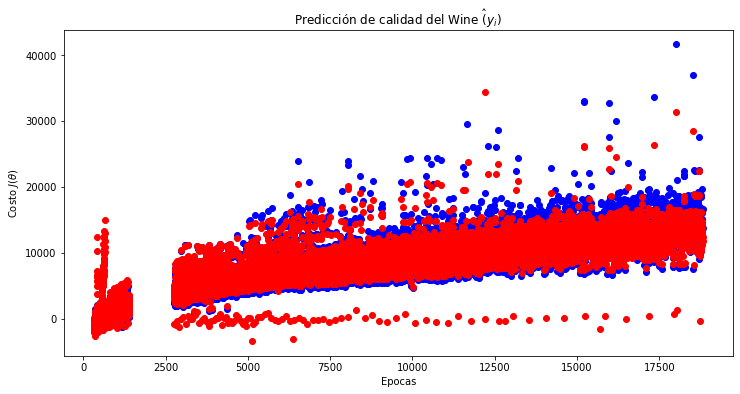

In [32]:
# 3.0 -> Se compara el modelo en C++ vs Python (Sklearn).

fig, axes = plt.subplots(figsize=(12,6))

plt.scatter(y_train, y_hat_train_sk, c='b', label='sklearn')
plt.scatter(y_train, y_hat[0:-1], c='r', label='Función C++')
axes.set_title('Predicción de calidad del Wine $\hat(y_i)$')
axes.set_xlabel('Epocas')
axes.set_ylabel(r'Costo $J(\theta)$')
plt.show()